Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.
- Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:
- Create the XOR gate's truth table dataset.
- Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.
- Observe and discuss the perceptron's performance in this scenario.
- Implement XOR using Multi-Layer Perceptron.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
# Creating the XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Displaying the dataset
data = pd.DataFrame(np.hstack((X, y)), columns=["Input1", "Input2", "Output"])
print(data)


   Input1  Input2  Output
0       0       0       0
1       0       1       1
2       1       0       1
3       1       1       0


In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    def activation_func(self, x):
        return np.where(x >= 0, 1, 0)




In [4]:
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X, y)
predictions = perceptron.predict(X)

print("Predictions:", predictions)
print("Actual:", y.ravel())

# Evaluate the performance
accuracy = np.sum(predictions == y) / len(y)
print("Accuracy:", accuracy)

# Multi-Layer Perceptron for XOR
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000)
mlp.fit(X, y.ravel())
mlp_predictions = mlp.predict(X)

print("\nMLP Predictions:", mlp_predictions)
print("Actual:", y.ravel())

# Evaluate the performance
mlp_accuracy = np.sum(mlp_predictions == y.ravel()) / len(y)
print("MLP Accuracy:", mlp_accuracy)


Predictions: [1 1 0 0]
Actual: [0 1 1 0]
Accuracy: 2.0

MLP Predictions: [1 1 0 0]
Actual: [0 1 1 0]
MLP Accuracy: 0.5


We can see that the outputs are not very close to the output when using the single layer perceptron and the accuracy is low.
On using Multi layer perceptron, accuracy has improved and th ouputs are closer to the expected outputs.

# Question 2
A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)
Task:
- Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).
- Use backpropagation to optimize the model's weights based on error calculation.
- Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
- Evaluate the model on a test set using accuracy and plot the loss over epochs.

In [5]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
# Define activation functions and their derivatives
# The activation functions and their derivaties are used in the neural network funtion for forward and backward propagation.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [7]:
data = df[['airline_sentiment', 'text']].copy()
data = data[data['airline_sentiment'] != 'neutral']  # Exclude neutral sentiments
data['airline_sentiment'] = data['airline_sentiment'].map({'positive': 1, 'negative': 0})

In [8]:
data

,airline_sentiment,text
1,1,@VirginAmerica plus you've added commercials t...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...
5,0,@VirginAmerica seriously would pay $30 a fligh...
6,1,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
14633,0,@AmericanAir my flight was Cancelled Flightled...
14634,0,@AmericanAir right on cue with the delays👌
14635,1,@AmericanAir thank you we got on a different f...
14636,0,@AmericanAir leaving over 20 minutes Late Flig...


In [9]:
# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
# Extracting the word count from the text data
def word_count(text):
    return len(text.split())

train_data['word_count'] = train_data['text'].apply(word_count)
test_data['word_count'] = test_data['text'].apply(word_count)

In [11]:
# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.zeros((1, output_size))

    # Forward Network: has inputs, performs the dot product to get the output which is passed to the activation function like relu.
    # Weighted sum with output and bias is calculated and output is sent to the last layer containing a sigmoid function.(gives binary output)
    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)  # Output layer (Binary)
        return self.a2

    # Backward propagation makes sure that outputs previously obtained are optimized using derivatives of activation functions like ReLU
    # Then the weights, learning rate and bias are adjusted and optimized
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        dZ2 = self.a2 - y
        dW2 = (1 / m) * np.dot(self.a1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

        dZ1 = np.dot(dZ2, self.weights2.T) * relu_derivative(self.z1)  # Correctly use ReLU derivative
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        # Update weights and biases
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2

In [12]:
# Training the model
X_train = np.array(train_data['word_count']).reshape(-1, 1)
y_train = np.array(train_data['airline_sentiment']).reshape(-1, 1)

input_size = 1
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 1000

model = NeuralNetwork(input_size, hidden_size, output_size)

losses = []
for epoch in range(epochs):
    outputs = model.forward(X_train)
    loss = np.mean((outputs - y_train)**2)
    losses.append(loss)
    model.backward(X_train, y_train, learning_rate)

In [13]:
# Evaluation on the test set
X_test = np.array(test_data['word_count']).reshape(-1, 1)
y_test = np.array(test_data['airline_sentiment']).reshape(-1, 1)

predictions = model.forward(X_test)
predicted_labels = (predictions > 0.5).astype(int)

accuracy = np.sum(predicted_labels == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8176699870073625


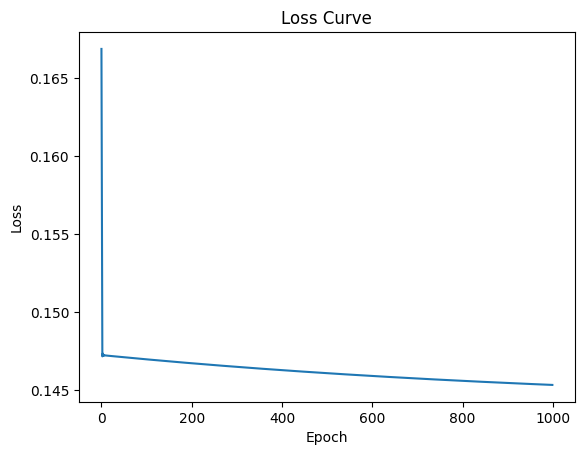

In [14]:
# Plot the loss over epochs
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()